# Homework Assignment #4 (Individual)
## Regression and SVM Predictive Models

### <p style="text-align: right;"> &#9989; Ella Kovach.</p>
### <p style="text-align: right;"> &#9989; kovachel.</p>

### Goal for this homework assignment
By now, you have learned a bit about predictive models. In this assignment, you will practice:

* Building predictive models using `statsmodels` and `sklearn`
* Evaluating your predictive models

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, April 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


---
## Part 0: Add to your Git repository to track your progress on your assignment (4 points)

For this assignment, you're going to add it to the `cmse202-s23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s23-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone https://github.com/kovachel/cmse202-s23-turnin-Kovach

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import seaborn as sns
from PIL import Image 
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Building a Model to Predict if it Will Rain Tomorrow

In this dataset we have weather data for a number of Australian cities. We’re going to **build a model that uses data from today to predict if it will rain tomorrow.** To simplify our model, let’s just look at the weather for one city.

## Part 1. Working with the Data

The dataset that we’ll be using can be found here:
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW4/aussie_weather_data.csv`

#### 1.1 (3 Points)
**Download the data set and read it in using Pandas.**

In [59]:
#Write your code here
data = pd.read_csv("aussie_weather_data.csv", delimiter=',', skiprows=0, encoding='utf-8')

#### 1.2 (3 Points)
This dataset has weather information for multiple cities in Australia. It’s quite a large dataset. In fact, it’s a little *too* large for our purposes; it will take a considerable amount of time to train a model on so much data. So we’ll just work with the data for a specific city.

The first thing we’ll do is see which cities we have data for. 
**Print out a list of the specific cities in this dataset.** (Note that this is not the same as printing the entire `Location` column.)

In [60]:
#Write your code here
cities = data["Location"].unique()
print(cities)

['NorfolkIsland' 'SydneyAirport' 'WaggaWagga' 'MelbourneAirport' 'Mildura'
 'Watsonia' 'Brisbane' 'Cairns' 'Townsville' 'MountGambier' 'Nuriootpa'
 'PerthAirport' 'Perth' 'AliceSprings' 'Darwin']


#### 1.3 (3 Points)
Select one of the cities (and **please** don't just pick the first one!). Cut down your dataframe so that it only contains data from your chosen city. You should also **look through the columns in this dataset and ensure that all of the data is ready for our analysis/model creation.**

In [61]:
#Write your code here
Darwin = data["Location"]=="Darwin"
darwins = data[Darwin]
darwin = darwins.drop(["Location"], axis =1)

#### 1.4 (3 Points)
Finally, before we start creating our models, let's first split our data into training and testing datasets. **Keep in mind what we want our model to predict and how this dataset gives you the information you need for your model.**

In [132]:
x = darwin.drop('RainTomorrow', axis = 1)
y = darwin['RainTomorrow']
train_data, test_data, train_labels, test_labels = train_test_split(x,y, test_size = 0.3, random_state = 21)
darwin

,Year,Month,DayOfMonth,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
36453,2008,7,1,20.0,33.1,0.0,4.4,11.0,0.0,41.0,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
36454,2008,7,2,19.4,32.4,0.0,6.0,10.4,22.5,50.0,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
36455,2008,7,3,18.2,31.8,0.0,8.0,11.0,0.0,46.0,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
36456,2008,7,4,17.3,30.7,0.0,7.0,10.4,0.0,44.0,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
36457,2008,7,5,15.5,30.8,0.0,7.0,10.8,337.5,46.0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39510,2017,6,20,19.3,33.4,0.0,6.0,11.0,22.5,35.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
39511,2017,6,21,21.2,32.6,0.0,7.6,8.6,0.0,37.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
39512,2017,6,22,20.7,32.8,0.0,5.6,11.0,0.0,33.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
39513,2017,6,23,19.5,31.8,0.0,6.2,10.6,337.5,26.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


## 2.0 Building a Regression Model

#### 2.1 (3 Points)
We’ll start by creating a regression model. **Does it make sense for us to use linear regression or logistic regression? Explain your choice.**

*I am going to go with a logistic regression. I think it would be beneficial to see the correlation and relevance of rainfall to each variable in the data set. It will allow us to see what parameters are the most statistically significant in the model. Also since the question is more of a yes or no question logistic regression would be more applicable.*

#### 2.2 (12 Points)
Create a regression model. Use the model summary to determine which parameters are most statistically significant in your model. If you get an error during at this stage it may be helpful to go back to part 1.3 and ensure that all of your data is appropriate for creating a model. 

In [133]:
#Write your code here
logit_model = sm.Logit(train_labels, sm.add_constant(train_data))
result = logit_model.fit()
print(result.summary() )

Optimization terminated successfully.
         Current function value: 0.275494
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                 2143
Model:                          Logit   Df Residuals:                     2119
Method:                           MLE   Df Model:                           23
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.5192
Time:                        14:32:48   Log-Likelihood:                -590.38
converged:                       True   LL-Null:                       -1227.9
Covariance Type:            nonrobust   LLR p-value:                3.313e-255
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           188.3213     68.670      2.742      0.006      53.731     322.911
Year             -0.

*A few of the statistically significant features consist of Year, Mintemp, Evaporation, Sunshine, RainToday.*

#### 2.3 (8 Points)
**Fit your test data and create/print a confusion matrix. We’ll use this to evaluate how well your predicitve model performs.**

In [134]:
rerun_training = True
filename = 'full_face_model.p'
tmp_vectors = train_data
tmp_labels = train_labels

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       687
           1       0.78      0.60      0.68       232

    accuracy                           0.86       919
   macro avg       0.83      0.77      0.79       919
weighted avg       0.85      0.86      0.85       919

[[647  40]
 [ 92 140]]


<function matplotlib.pyplot.show(close=None, block=None)>

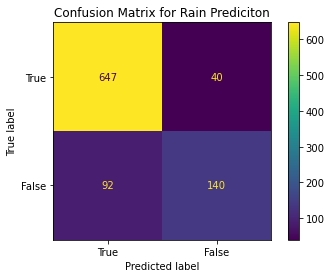

In [135]:
predict_vectors = sm.add_constant(test_data)
true_labels = test_labels

pred_labels = np.round(result.predict(predict_vectors))

cm = confusion_matrix(true_labels, pred_labels)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

CM = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
CM.plot()
plt.title("Confusion Matrix for Rain Prediciton")
plt.show

#### 2.4 (3 Points)
Look at/calculate the Precision and Recall of your model. **Which one is greater? Describe in plain language what that means about the performance of your model (I.e., the circumstances in which it does/doesn’t do well).**

*Precision how often it is predicted posivite and is right. Recall the ratio of true positives to the sum of true positives and false negatives. Precision appears to be greater when the model is predicting it won't rain. Where as Recall is greater when the model is predicting it will rain.*

## 3.0 Interlude: A Base Rate Frequency Model (12 Points)

If we didn't create a fancy model for predicting future rainfall, would that mean that we had *no way* of predicting if it would rain? Of course not. There's always *some* kind of model we can use (they just won't be very sophisticated). 

In the case of our problem--predicting whether it will rain tomorrow--what is the simplest model we could use? We'd need to look at the **base rate frequency**. If we know that, over the course of the year, it rains ~30% of the time, that would be our base rate frequency. If we were to guess that it would be sunny every day of the year, we'd be wrong ~30% of the time, *but we'd be right ~70% of the time.* 

Why is this important? Imagine we create a sophisticated model that accurately predicts rain/no rain ~60% of the time; without any other information, we might think, "That's not too bad, I guess." It certainly feels better than *no* information, right? Now think about the base rate frequency model, which achieves an accuracy of **70%** just by guessing the same thing every time. Suddenly, our sophisticated model seems like crap! It tells us we could be doing ~10% better than our fancy model by guessing. This is why we use the base rate frequency as a simple way to test our models.


**Calculate how frequently it rains in your city. If you were to guess that it *wasn't* going to rain every day, how frequently would you be right? (We'll use this as our baseline model.)**


In [136]:
#Write your code for calculating the frequency of rain here.
rains = darwin["RainTomorrow"] == 1
rainy_days = rains.sum()
days = len(darwin.index)

Frequency = 1 - rainy_days/days
print(Frequency)

0.7423252775963423


*It would be right 74.2% of the time.*

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

## 4.0 SVM Model

We’ve seen how regression faired in predicting rain; now let’s give Support Vector Machines a shot. 

It’s not clear, *a priori*, which type of kernel (linear or RBF) would fair better. Therefore, we’ll need to test out both kernel types, as well as multiple values for hyperparameters ($C$ and $\gamma$). 

#### 4.1 (12 Points)
Run a grid search over both types of kernels and multiple values of $C$ and $\gamma$ (we recommend [0.01,0.1,1.0,10.0] for both). We *STRONGLY* recommend you set the parameter `n_jobs=-1` in `GridSearchCV`, which will distribute the computational load. Make sure to write down your best-fit hyperparameters. 

In [137]:
start = time.time()

tmp_vectors = train_data
tmp_labels = train_labels

print("Fitting the classifier to the training set")

param_grid = {'C': [0.01,0.1,1.0,10.0],
              'gamma': [0.01,0.1,1.0,10.0],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


KeyboardInterrupt: 

*The best for hyper-parameters are 0.01 for both C and gamma.*

#### 4.2 (8 Points)
Using your best-fit parameters, classify your test data and print off the confusion matrix. Note/calculate the Precision and Recall for your SVM model, as well as the overall accuracy.

$\mathrm{Accuracy} = \frac{\mathrm{Accurate~Predictions}}{\mathrm{Total~Samples}}$.

Fitting the classifier to the training set
Predicting if it will 
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       687
           1       0.68      0.85      0.76       232

    accuracy                           0.86       919
   macro avg       0.81      0.86      0.83       919
weighted avg       0.88      0.86      0.87       919

The Accuracy is 0.8313384113166485


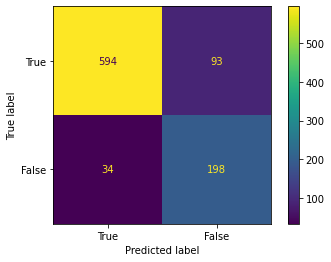

In [138]:
tmp_vectors = train_data
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [0.01],'gamma': [0.01], 'kernel': ['linear']}

clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs = -1)
clf = clf.fit(tmp_vectors, tmp_labels)
pred_x = test_data
y_true = test_labels
print("Predicting if it will ")
pred_labels = clf.predict(pred_x)
print(classification_report(y_true, pred_labels))
ConfusionMatrixDisplay.from_estimator(clf, test_data, test_labels, display_labels = [True, False])

prediction = 555+209
total = 919
Accuracy = prediction/total
print("The Accuracy is",Accuracy)

In [85]:
#Write your code here
pred_labels = grid_search.predict(test_data)

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

Acurracy = (622+173)/len(test_data)
print(Acurracy)

[[622  63]
 [ 61 173]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       685
           1       0.73      0.74      0.74       234

    accuracy                           0.87       919
   macro avg       0.82      0.82      0.82       919
weighted avg       0.87      0.87      0.87       919

0.8650707290533188


## 5. Evaluation of Models

Here we’re going to investigate how well our predictive models actually work.


#### 5.1 (5 Points)

Compare the accuracy of both of your predictive models (regression and SVM) to the baseline model from part 3. Do your predictive models do better than the baseline model? Is their performance relative to the baseline model what *you* would expect? 


*The baseline model accuracy was the lowest accuracy. The value was found to be 74.5%, this was the lowest accuracy. The SVM was found to have a higher accuracy of 83.1%. The accuracy for the regression model was found to be the most accurate at 86.5%. Both of the models created were found to be more accurate then the simple frequency model. I did expect this performance relative to the baseline model. Since the two models are Machine learning models and learning from the data how to predict accurate values. Therefore, it makes sense that the value would be quite a bit higher than the simple frequency prediction, where we simply predicted that it won't rain everyday since that is what happens majority of the time.*

#### 5.2 (5 Points)

Let’s test the robustness of your model. Before you do anything, you should record the precision, recall, and accuracy of your two predictive models (if you haven’t already). Once you’ve done that, go all the way back to part 1.4 and change the random seed for `train_test_split`. Using this new data split, rerun all of your code from parts 2 and 4. For each new random seed, record the precision, recall, and accuracy for both models (and write them, as well as the random seed, in the cell below!). Do this for 3-5 different random seeds. 


Regession Model: 
Initially: seed = 42, accuracy = 87%, precision = 0: 0.92, 1: 0.73, recall = 0: 0.90, 0: 0.76.

Round 2: seed = 21, accuracy = 86%, precision = 0: 0.88, 1: 0.78, recall = 0: 0.94, 0: 0.60.

Round 3: seed = 84, accuracy = 87%, precision = 0: 0.92, 1: 0.75, recall = 0: 0.92, 0: 0.75.

Round 4: seed = 168, accuracy = 86%, precision = 0: 0.89, 1: 0.74, recall = 0: 0.93, 0: 0.65.


SVM: 
Initially: seed = 42, accuracy = 83%, precision = 0: 0.96, 1: 0.62, recall = 0: 0.81, 0: 0.89.

Round 2: seed = 21, accuracy = 86%, precision = 0: 0.88, 1: 0.78, recall = 0: 0.94, 0: 0.60.

Round 3: seed = 84, accuracy = 87%, precision = 0: 0.92, 1: 0.75, recall = 0: 0.92, 0: 0.75.

Round 4: seed = 168, accuracy = 86%, precision = 0: 0.89, 1: 0.74, recall = 0: 0.93, 0: 0.65.

#### 5.3 (5 Points)

How much variation did you observe in the precision, recall, and accuracy in your models? After going through this exercise, how (if at all) does this change your response to part 5.1? 

*There was very little variation in accuracy for all the different seeds. The accuracy stayed between 86% or 87% which is still more accurate than the SVM as well as the baseline case. The precision and recall varied a bit more, but not to an extreme amount that will affect the accuracy. Therefore I wouldn't change anything from my response in 5.1*

#### 5.4 (5 Points)

Finally, compare the performance of your regression and SVM models. Which, if any, performed better? Esxplain.

*The regression model is more accurate compared to the SVM they are both better than the baseline, but when compared to one another the regression comes out on top. Especially since the regression model values flucuated less when set at different seeds. Therefore making it a more consistent model.*

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### Congratulations, you're done!

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University